# OpenCV и базированая работа с изображениеями

Импорт библиотек

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
plt.style.use('dark_background')

Загрузка изображения

In [69]:
img = cv2.imread("image1.png")
img.shape

(512, 512, 3)

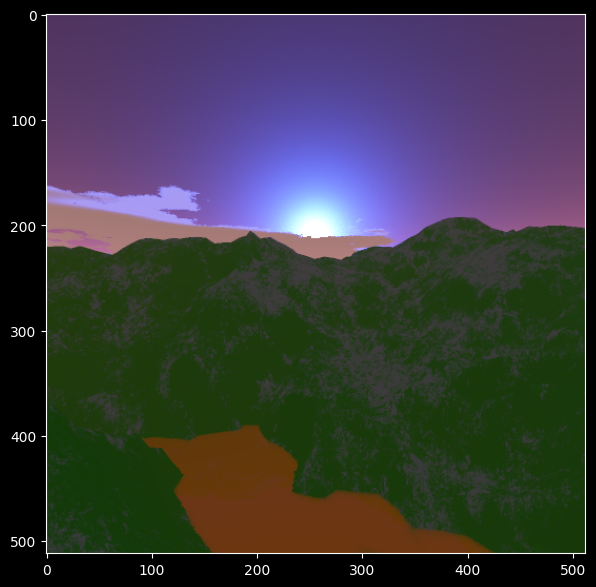

In [70]:
plt.figure(figsize=(7,7))
plt.imshow(img);

In [34]:
def show_imgs(i1, i2, title1='img 1', title2='img 2'):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(121)
    plt.gca().set_title(title1)
    plt.imshow(i1)
    ax = fig.add_subplot(122)
    plt.gca().set_title(title2)
    plt.imshow(i2)

1. Сохранить обрезанное изображение(x=0,y=0,w=50,h=100) используя цветовой формат LUV.

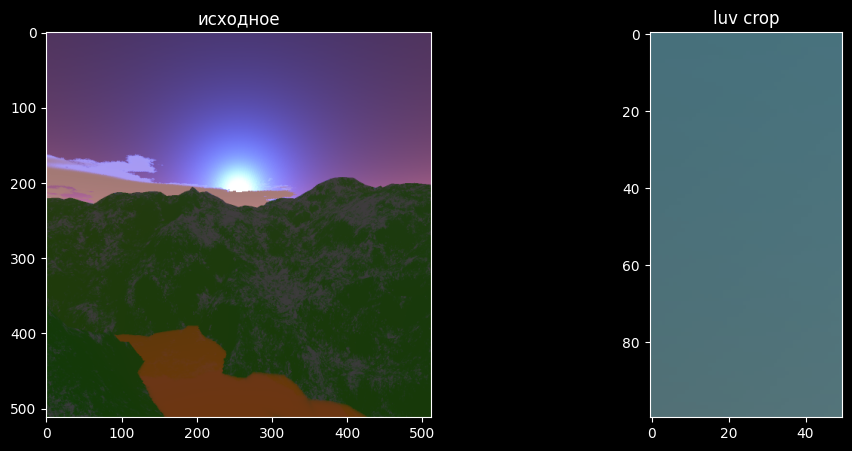

In [49]:
y = 0
h = 100
x = 0
w = 50

img_crop = img[y:y+h,x:x+w,:]
luv_img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2LUV)

cv2.imwrite('images/1_luv_img_crop.png', luv_img_crop)
# cv2.imwrite('images/1_luv_img_crop.png', cv2.cvtColor(img_crop, cv2.COLOR_BGR2LUV))

show_imgs(img, luv_img_crop, 'исходное', 'luv crop')

# img1 = cv2.imread("images/1_luv_img_crop.png")
# show_imgs(img, img1)


2. Сохранить изображение, которое содержит вторую треть по вертикали и третью четверть по горизонтали от исходного, используя цветовой формат HSV

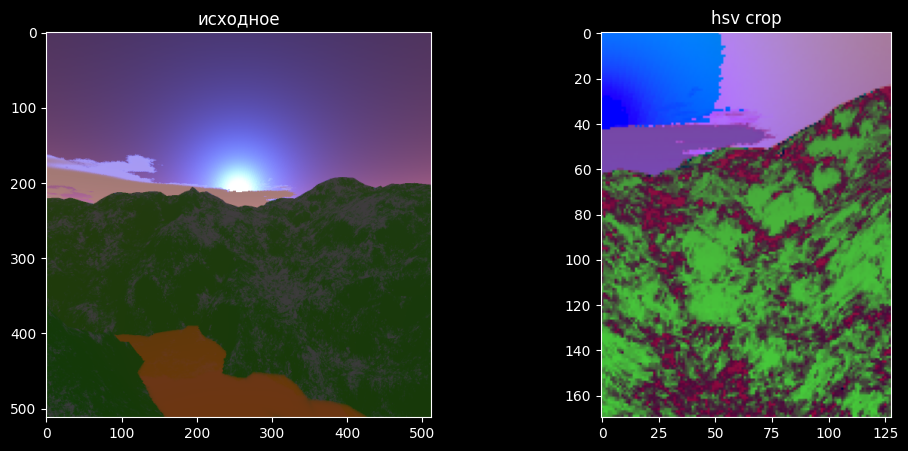

In [50]:
y = 512 // 3
h = 512 // 3
x = (512 // 4) * 2
w = 512 // 4

img_crop = img[y:y+h,x:x+w,:]
hsv_img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2HSV)

cv2.imwrite('images/2_hsv_img_crop.png', hsv_img_crop)

show_imgs(img, hsv_img_crop, 'исходное', 'hsv crop')

3. Сохранить обрезанное изображение(x=75,y=65,w=150,h=130) используя цветовой формат LAB

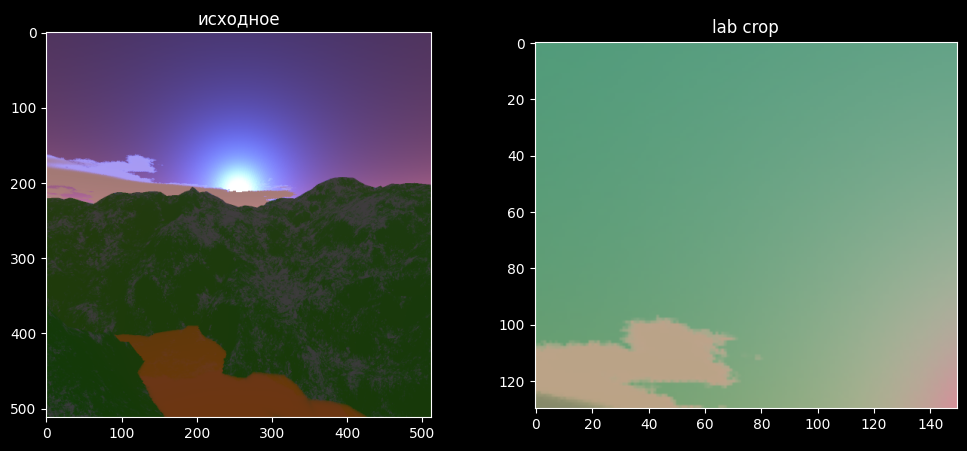

In [51]:
y = 65
h = 130
x = 75
w = 150

img_crop = img[y:y+h,x:x+w,:]
lab_img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2LAB)

cv2.imwrite('images/3_lab_img_crop.png', lab_img_crop)

show_imgs(img, lab_img_crop, 'исходное', 'lab crop')

4. Сохранить изображение, содержащее правую нижнюю четверть исходного в формате BRG

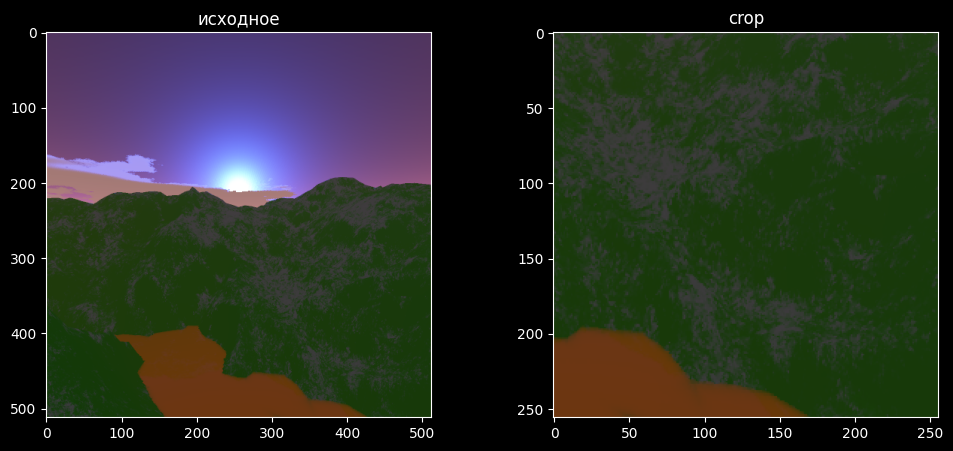

In [52]:
y = 256
h = 256
x = 256
w = 256

img_crop = img[y:y+h,x:x+w,:]

cv2.imwrite('images/4_bgr_img_crop.png', img_crop)

show_imgs(img, img_crop, 'исходное', 'crop')

5. Сохранить изображения масштаб которого увеличен в 3 раза

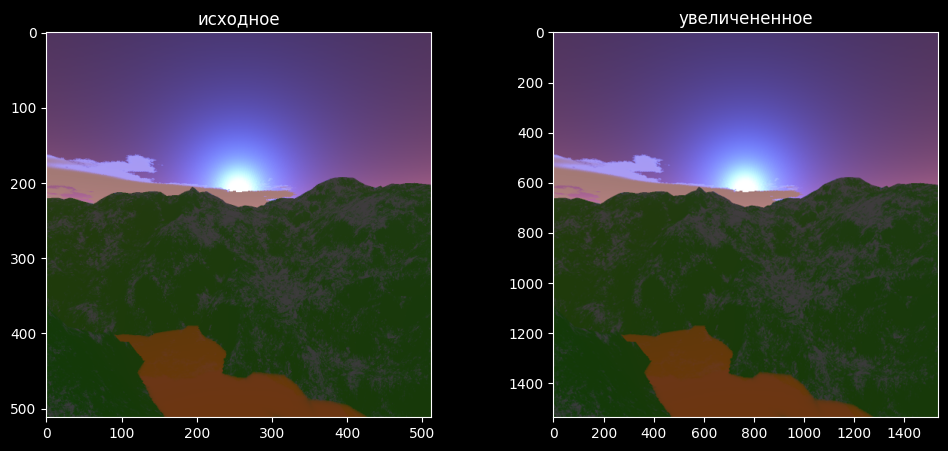

In [43]:
increase = cv2.resize(img, None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
cv2.imwrite('images/5_increase_img.png', increase)

show_imgs(img, increase, 'исходное', 'увеличененное')

6. Сохранить изображение ширина которого увеличена в 2 раза, а высота уменьшена в 2раза

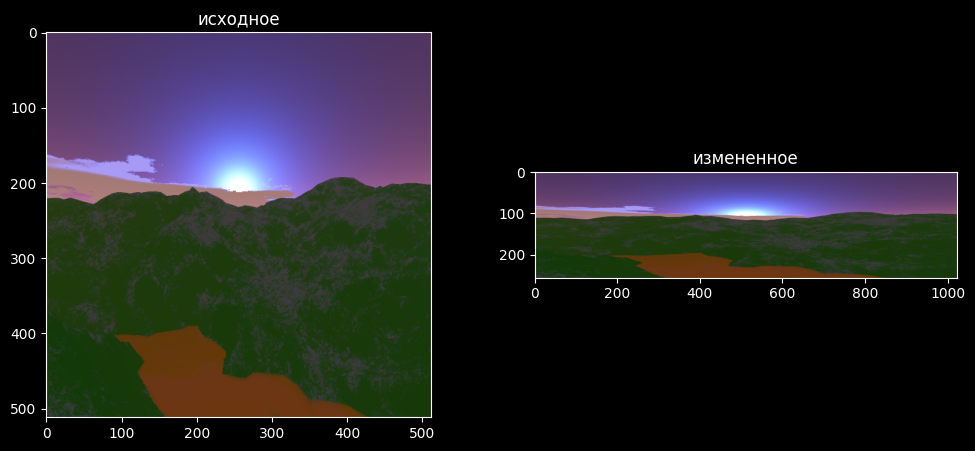

In [44]:
changed = cv2.resize(img, None,fx=2, fy=.5, interpolation = cv2.INTER_CUBIC)
cv2.imwrite('images/6_changed_img.png', changed)

show_imgs(img, changed, 'исходное','измененное')

7. Сохранить изображение ширина которого стала 146, а высота 228

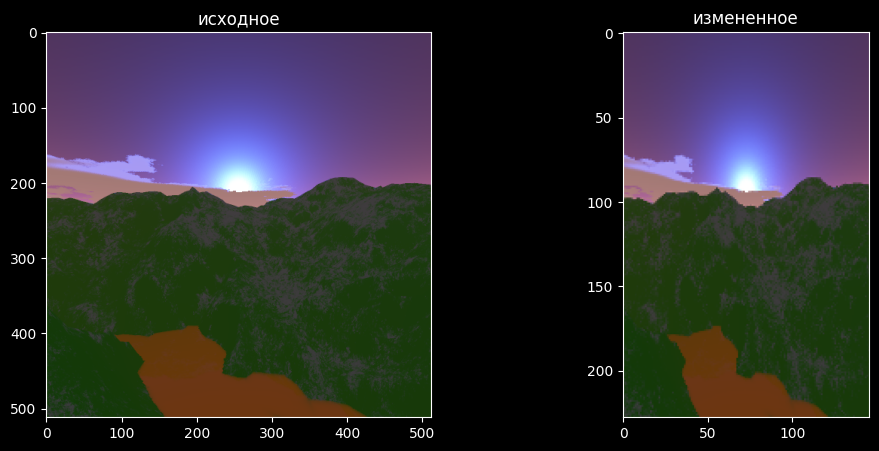

In [45]:
x = 146 / 512
y = 228 / 512

changed = cv2.resize(img, None,fx=x, fy=y, interpolation = cv2.INTER_CUBIC)
cv2.imwrite('images/7_changed_img.png', changed)

show_imgs(img, changed, 'исходное','измененное')

8. Сохраните 3-канальное изображение, содержащее только U канал цветового формата LUV.

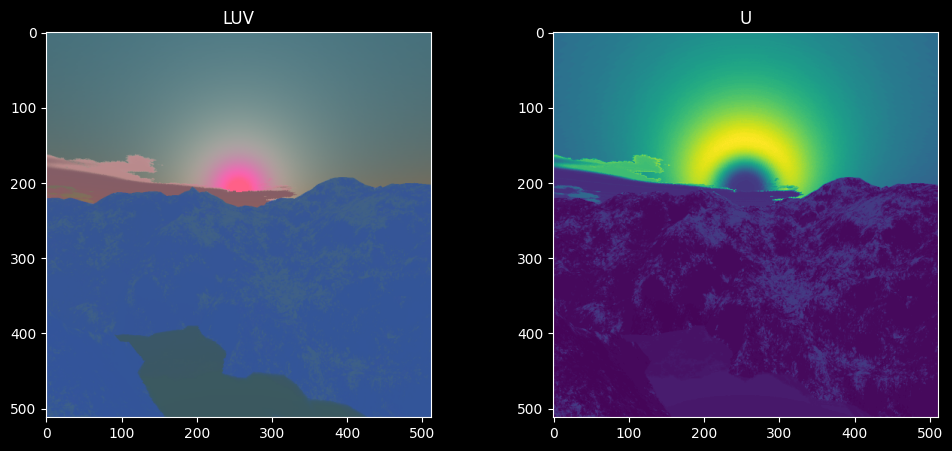

In [60]:
luv_img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
timg = luv_img[:,:,1] # 0-L, 1-U, 2-V

cv2.imwrite('images/8_luv_u_img.png', timg)

show_imgs(luv_img, timg, 'LUV','U')

9. Сохранить изображение в формате GRB от исходного.

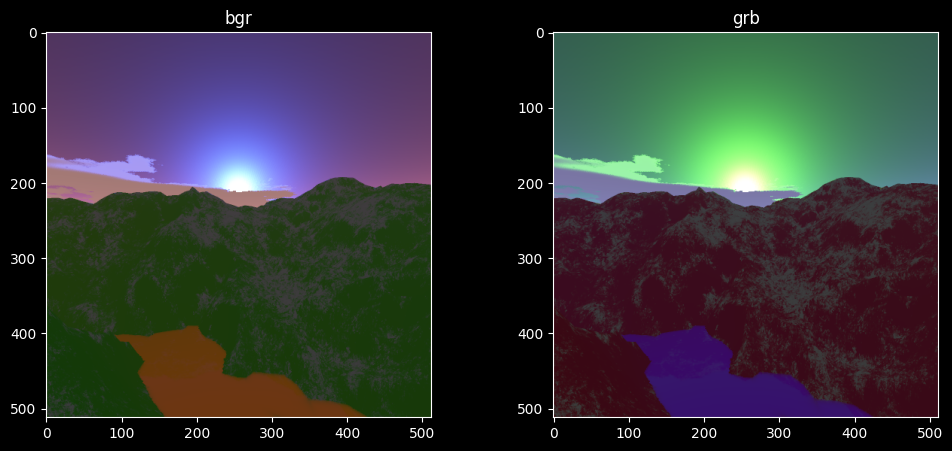

In [63]:
r = img[:,:,2]
g = img[:,:,1]
b = img[:,:,0]

grb_img = cv2.merge([g, r, b])

cv2.imwrite('images/9_grb_img.png', grb_img)

show_imgs(img, grb_img, 'bgr', 'grb')

10. Сохранить изображение, левая половина которого в формате HSV а правая в LUV.

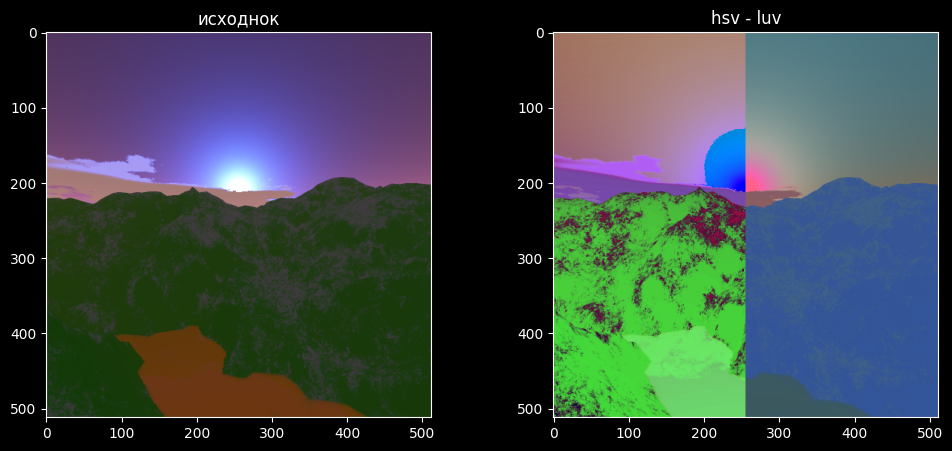

In [64]:
height, width, _ = img.shape
half_width = width // 2

left_half = img[:, :half_width, :]
right_half = img[:, half_width:, :]

left_half_hsv = cv2.cvtColor(left_half, cv2.COLOR_BGR2HSV)

right_half_luv = cv2.cvtColor(right_half, cv2.COLOR_BGR2LUV)

combined_img = np.hstack((left_half_hsv, right_half_luv))

cv2.imwrite('images/10_hsv_luv_img.png', combined_img)

show_imgs(img, combined_img, 'исходное', 'hsv - luv')

11. Сохранить изображение первая и третья четверти которого перевернуты (номера четвертей по декарту)

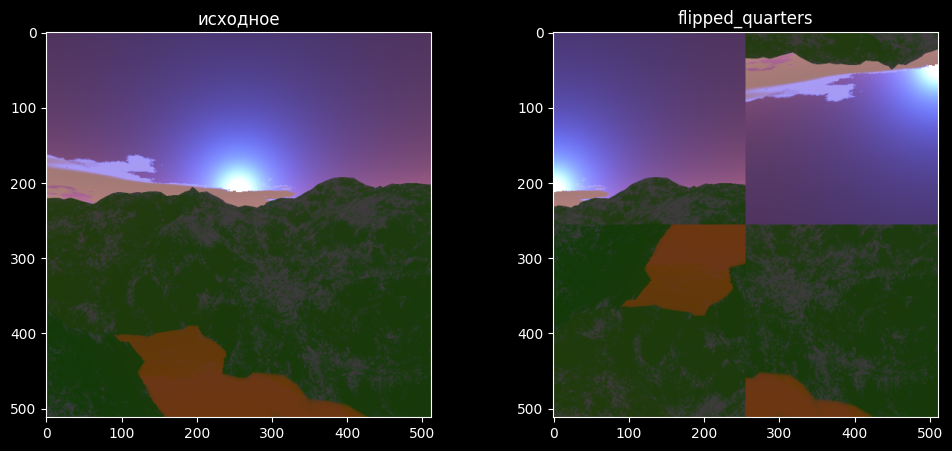

In [68]:
height, width, _ = img.shape
half_height = height // 2
half_width = width // 2

first_quarter_flipped = img[:half_height, half_width:, :]
second_quarter = cv2.flip(img[:half_height, :half_width, :], 0)
third_quarter_flipped = cv2.flip(img[half_height:, :half_width, :], 0)
fourth_quarter = img[half_height:, half_width:, :]

combined_img = np.vstack((np.hstack((first_quarter_flipped, second_quarter)), np.hstack((third_quarter_flipped, fourth_quarter))))

cv2.imwrite('images/11_flipped_quarters.png', combined_img)

show_imgs(img, combined_img, 'исходное', 'flipped_quarters')